In [12]:
import numpy as np
from torch import nn


In [45]:

torch.manual_seed(42)
W=10
B=20
X=torch.randint(low=1 ,high=10,size=(100,1))
Y=X*W+B




In [14]:
Y.shape

torch.Size([100, 1])

In [46]:
import torch 
from torch import nn
class model_one(nn.Module):

    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.tensor(1,dtype=torch.float),requires_grad=True)
        self.bias=nn.Parameter(torch.tensor(1,dtype=torch.float),requires_grad=True)
        
    def forward(self,x):
        return self.weight*x+self.bias





In [47]:
model=model_one()

In [ ]:
# model.state_dict()
# [*model.parameters()]

<Axes: >

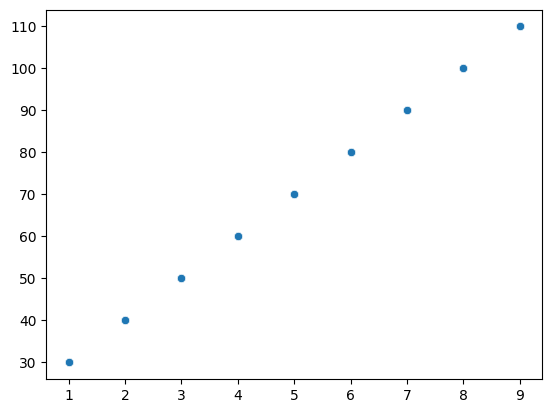

In [48]:
X = X.squeeze()  # or X = X.view(-1)
Y = Y.squeeze()
import seaborn as sns
# Plots
sns.scatterplot(x=X.numpy(), y=Y.numpy())  # Convert to NumPy before passing to Seaborn

In [49]:
loss_fn=nn.L1Loss()
optimzer=torch.optim.SGD(params=model.parameters(),lr=0.01)

In [50]:
from sklearn.model_selection import train_test_split


In [53]:

train_loss=[]
epoches_num=[]

x_train=X[:90]
y_train=Y[:90]
epoches=5000

for i in range(epoches):
    
    model.train()
    y_pred=model(x_train)
    loss=loss_fn(y_pred,y_train)
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()
    
    
    if i%10==0:
        model.eval()
        
        with torch.inference_mode():
            y_pred=model(X[90:])
            loss=loss_fn(y_pred,Y[90:])
                
            print(loss.item())
            epoches_num.append(i)
            train_loss.append(loss.item())
    

4.283335208892822
4.270663738250732
4.257987976074219
4.245312690734863
4.232637405395508
4.219961166381836
4.237272262573242
4.224368572235107
4.211466312408447
4.198563575744629
4.185660362243652
4.1727614402771
4.159857749938965
4.146955490112305
4.134052276611328
4.121148586273193
4.108250141143799
4.095346927642822
4.082444190979004
4.069540977478027
4.056637287139893
4.043739318847656
4.03083610534668
4.017932415008545
4.005030155181885
3.9921271800994873
3.9792239665985107
3.966325283050537
3.9534218311309814
3.940518617630005
3.9276161193847656
3.914712429046631
3.9018139839172363
3.8889107704162598
3.8760077953338623
3.8631045818328857
3.85020112991333
3.837298631668091
3.824496030807495
3.8118197917938232
3.799144744873047
3.7864696979522705
3.773794651031494
3.761122226715088
3.7484469413757324
3.7357704639434814
3.723095417022705
3.710421085357666
3.6977462768554688
3.6850712299346924
3.672396183013916
3.6597237586975098
3.6470484733581543
3.634373426437378
3.62169694900512

3.139448642730713
3.126542329788208
3.1136391162872314
3.1007378101348877
3.0878360271453857
3.074932813644409
3.062030792236328
3.049129009246826
3.0362250804901123
3.023430347442627
3.010756015777588
2.998081922531128
2.985407590866089
2.97273325920105
2.9600586891174316
2.9473843574523926
2.934710741043091
2.922031879425049
2.9093575477600098
2.89668345451355
2.8840091228485107
2.8713347911834717
2.8586602210998535
2.8459858894348145
2.8333091735839844
2.8206334114074707
2.8079590797424316
2.7952849864959717
2.7826106548309326
2.7699363231658936
2.7572617530822754
2.7445874214172363
2.7319138050079346
2.7192349433898926
2.7065606117248535
2.6938865184783936
2.6812121868133545
2.6685378551483154
2.6558632850646973
2.643188953399658
2.630512237548828
2.6178364753723145
2.635129928588867
2.6222281455993652
2.609326124191284
2.596423625946045
2.5835213661193848
2.570620059967041
2.5577175617218018
2.5448105335235596
2.5319080352783203
2.5190062522888184
2.5061042308807373
2.493201732635

In [54]:
model.state_dict()

OrderedDict([('weight', tensor(9.9940)), ('bias', tensor(19.9511))])

In [56]:
from pathlib import Path
model_path=Path('models')
model_path.mkdir(parents=True,exist_ok=True)
file_name='Rizwan_sabir_first_model.pth'
file_path=model_path / file_name
torch.save(obj=model.state_dict(),f=file_path)

In [ ]:
model2=model_one()
model2.load_state_dict()